<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/SVD_NMF_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 04 SVD

1. svd 개요

* svd 역시 pca와 유사한 행렬 분해 기법을 사용한다.

* svd는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다. 

* m x n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미한다.
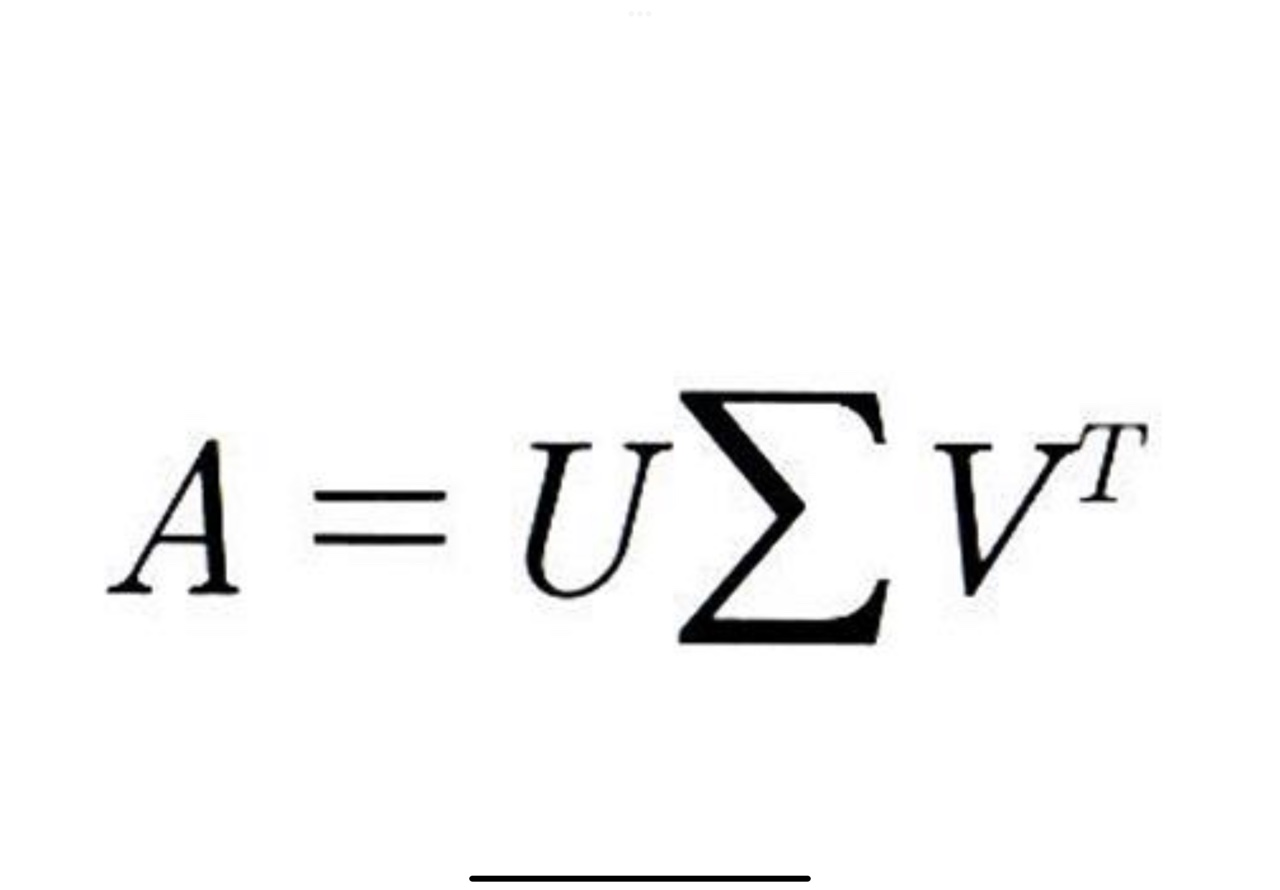

* svd는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가짐.

* 시그마는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지는 모두 0임.
* 시그마가 위치한 0이 아닌 값이 바로 행렬 A의 특이값임.
* SVD는 A의 차원이 m x n 일 때 U의 차원이 m x m, 시그마의 차원이 m x n , VT의 차원이 n x n 으로 분해한다.
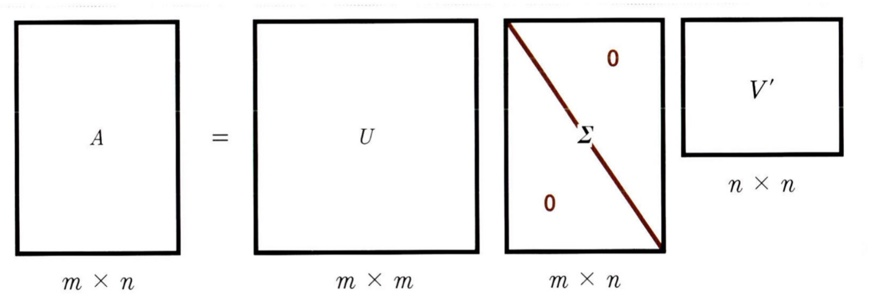

다음과 같이 시그마의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 시그마에 대응되는 U와 V원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다. 이렇게 컴팩트한 형태로 SVD를 적용하면 A의 차원이 mxn 일 때, U의 차원을 m x p, 시그마의 차원을 p x p , VT의 차원을 p x n 으로 분해한다.

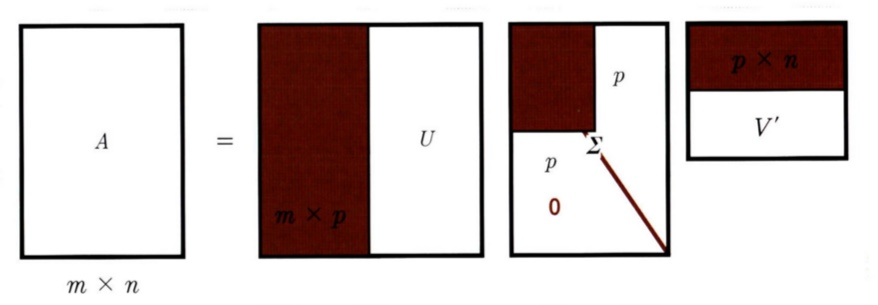

Truncated SVD는 시그마의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것이다. 

* 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행한다.

In [1]:
# 랜덤 행렬 생성하는 이유 = 행렬의 개별 로우끼리의 의존성을 없애기 위해서


# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))
     

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


-> a행렬에 SVD를 적용해 U, sigma, Vt를 도출한다.

* numpy.linalg.svd에 파라미터로 원본 행렬 입력시 U, Sigva, V전치행렬을 반환함.
* 시그마 행렬인 경우 대각에 위치한 값만 0이 아니고 나머지는 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현

In [2]:

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))
  

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


-> sigma의 경우 1차원 행렬인 (4,)로 반환된 것을 확인할 수 있다.

In [3]:
#원본행렬로 복원하기. 내적

# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 이제 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 sigma값이 변하고 이에 따른 차원 축소가 진행될 수 있는지 알아보자. 

In [4]:
#의존성을 부여하기 위해 a행렬의 3번째 로우를 '첫번째로우 + 두번째로우' 로 업데이트하고 4번째 로우는 첫 번째 로우와 같다고 업데이트
a[2] = a[0]+a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


-> 로우 간 관계까 매우 높아짐.
다시 SVD로 분해해보자.

In [5]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


-> 이전과 차원은 같지만 sigma값 중 2개가 0으로 변함. 즉 선형 독립인 로우 벡터의 개수가 2개라는 의미.

- 이번에는 U, sigma, Vt의 전체 데이터를 이용하지 않고 sigma의 0에 대응되는 U, sigma, Vt의 데이터를 제외하고 복원하자. 

즉, 시그마의 경우 앞의 2개 요소만 0이 아니므로 U행렬 중 선행 두개의 열만 추출하고, Vt의 경우는 선행 두 개의 행만 추출해 복원하는 것이다.

In [6]:

# U 행렬의 경우 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD

시그마 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식.

이렇게 분해하면 인위적으로 더 작은 차원의 U, sigma, Vt로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수 는 없음. 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당하 ㄴ수준으로 원본 행렬을 근사할 수 있음. 

* 사이파이 모듈에서 지원함. 
* 사이파이는 SVD, Truncated SVD 지원함. 
* Truncated SVD는 희소 행렬로만 지원돼서 scipy.sparse. linalg.svds를 이용해야함. 

In [7]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)   # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)
     

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

-> Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.

#### 사이킷런  TruncatedSVD 클래스를 이용한 변환

* 사이킷런의 TruncatedSVD 클래스는  U, Sigma, Vt를 반환하지 않고 fit과 transform을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환한다. 

Text(0, 0.5, 'TruncatedSVD Component 2')

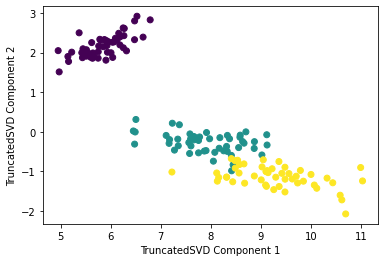

In [8]:
#붓꽃데이터세트를 TruncatedSVD를 이용해 변환해보자.

from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

-> TruncatedSVD변환 역시 pca와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있다.

Text(0.5, 1.0, 'PCA Transformed')

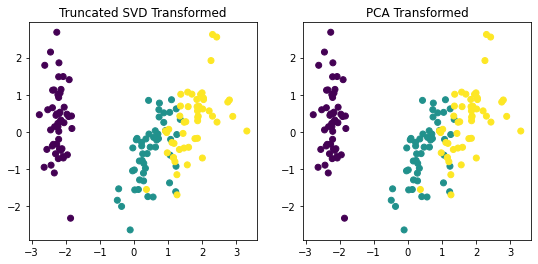

In [9]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
     

-> 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 실제로 비교해보면 거의 같음. 

In [10]:

print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())
     

2.3224709192840956e-15
2.7755575615628914e-17


-> 모두 0에 가까운 값이므로 2개 변환이 서로 동일함. 

즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다. 

* 하지만 PCA는 밀집행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능하다. 

### 05 NMF(Non, Negative Matrix Factorization)

1. 개요 

* 낮은 랭크를 통한 행렬근사 방식의 변형이다.
* 원본 행렬내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 좀 더 간단하게 두개의 기반 양수행렬로 분해될 수 있는 기법을 지칭함. 

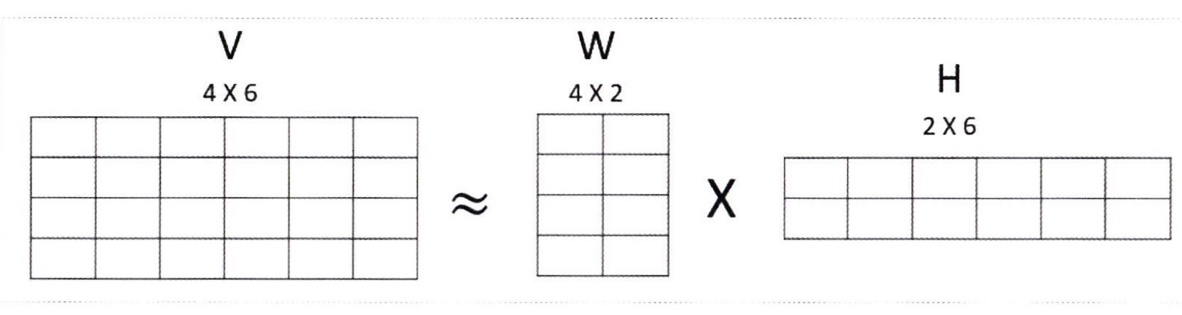

이렇게 행렬분해를 하게되면 W행렬과 H행렬은 일반적으로 길고 가는 행렬W와 작고 넓은 행렬H로 분해된다. 이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 된다. 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬H는 이 잠재 요소가 워본 열로 어떻게 구성됐는지 나타내는 행렬이다.
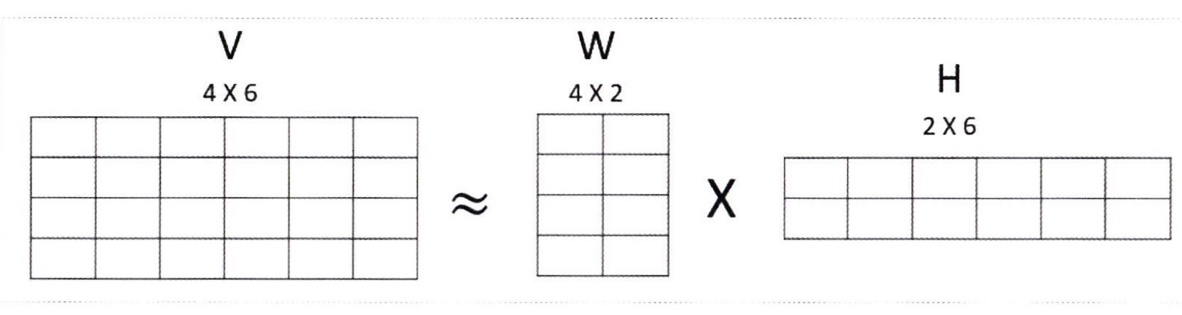

* NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용
* NMF는 NMF클래스르 이용해 지원됨.

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

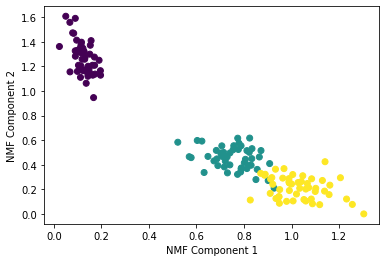

In [11]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

-> NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨.

또, 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위를 예측하고 높은 순위로 예측된 상품을 추천해주는 방식임. 

### 06 정리

* PCA : 입려 ㄱ데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식

* LDA : 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소함.

* SVD, NMF : 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법

